# Evaluation of Two point statistics by epochs

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
from rockgan.architecture import *
from rockgan.utils import *

import porespy as ps
from quantimpy import minkowski as mk
from skimage.measure import euler_number
from sklearn.metrics import mean_squared_error

## Specifying GPU

In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

DEVICE = torch.device('cuda')

## Importing Real dataset

In [4]:
# Uploading 1024 samples extracted from the original sample
DATASET = torch.from_numpy(np.load('../data/Berea_subpatches.npy'))
print(DATASET.shape)

torch.Size([1024, 128, 128, 128])


In [5]:
two_point=[]
for j in range((len(DATASET[:,0,0,0]))):
    data_real = ps.metrics.two_point_correlation(DATASET[j,:,:,:])
    two_point.append(data_real.probability)

two_point_mean_data = np.mean(np.array(two_point), axis=0)

## Parameters for loading the models

In [6]:
# Training hyperparameters
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
Z_DIM = 16
# fixed noise for display
fixed_noise = torch.randn(BATCH_SIZE,1, Z_DIM, Z_DIM, Z_DIM).to(DEVICE)
# generator
gen = Generator(in_channel=1, out_channel=1).to(DEVICE)
# optimizer
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.0, 0.9))

In [7]:
epochs = np.arange(0, 102, 2, dtype=int)[1:]-1

## RockGAN

In [8]:
two_point_mean_RockGAN = []
for i in epochs:
    #Loading generator per epochs
    load_checkpoint(f"../checkpoints/generator/generator_no_poro_{i}_V2.pt", \
                    model=gen, optimizer=opt_gen, lr=1e-3)
    fake_images = gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128)
    
    #Storing 2-points statistics curve
    two_point = []
    for j in range((len(fake_images[:,0,0,0]))):
        data_fake = ps.metrics.two_point_correlation(fake_images[j,:,:,:])
        two_point.append(data_fake.probability)
        
    two_point_mean_RockGAN.append(np.mean(np.array(two_point), axis=0))

#Converting into arrays
two_point_mean_RockGAN = np.array(two_point_mean_RockGAN)

=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading

## CRockGAN

In [9]:
two_point_mean_CRockGAN = []
for i in epochs:
    #Loading generator per epochs
    load_checkpoint(f"../checkpoints/generator/generator_poro_{i}_v4.pt", \
                    model=gen, optimizer=opt_gen, lr=1e-3)
    fake_images = gen(fixed_noise).detach().cpu().numpy().reshape(BATCH_SIZE,128,128,128)
    
    #Storing 2-points statistics curve
    two_point = []
    for j in range((len(fake_images[:,0,0,0]))):
        data_fake = ps.metrics.two_point_correlation(fake_images[j,:,:,:])
        two_point.append(data_fake.probability)
        
    two_point_mean_CRockGAN.append(np.mean(np.array(two_point), axis=0))

#Converting into arrays
two_point_mean_CRockGAN = np.array(two_point_mean_CRockGAN)


=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading checkpoint
=> Loading

## Plotting MSE of two point statistics by epochs 

In [10]:
mse_RockGAN = []
mse_CRockGAN = []
for i in range(len(epochs)):
    err_1 = mean_squared_error(two_point_mean_data, two_point_mean_RockGAN[i])
    err_2 = mean_squared_error(two_point_mean_data, two_point_mean_CRockGAN[i])
    mse_RockGAN.append(err_1), mse_CRockGAN.append(err_2),

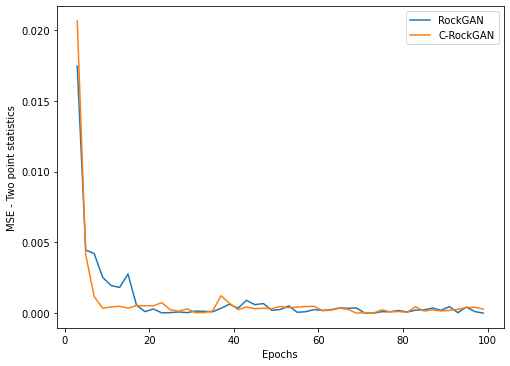

In [15]:
plt.figure(figsize=(7,5))
plt.plot(epochs[1:], np.array(mse_RockGAN)[1:], label='RockGAN')
plt.plot(epochs[1:], np.array(mse_CRockGAN)[1:], label='C-RockGAN')
plt.tight_layout()  
plt.xlabel('Epochs')
plt.ylabel('MSE - Two point statistics')
plt.legend()
plt.show()